# Image Classification with TensorFlow

Image classification is a machine learning task whose goal is to categorize images into certain classes based on their content. In image classification, deep learning models are built to recognize and understand image characteristics, such as color, shape, and structure, and then classify those images into appropriate classes, such as animals, plants, food, and more.

I classified this image using MNIST dataset which I got from Keras API

### tensorflow and tf.keras

In [1]:
import tensorflow as tf
from tensorflow import keras

### helper libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 26s 6us/step


### define the class name

In [4]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### preprocess the data

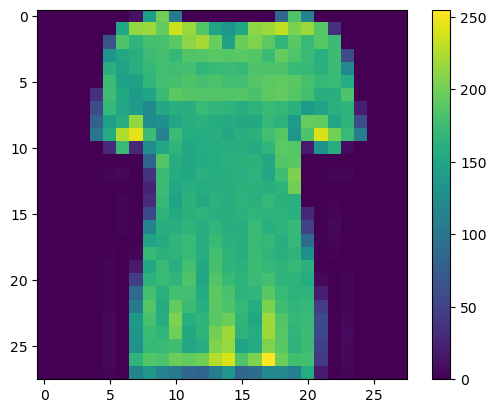

In [13]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.show()

by default the scale values range from 0 to 255

In [24]:
train_images.min()

0.0

In [25]:
train_images.max()

255.0

scale these values to a range of 0 to 1

In [26]:
train_images = train_images/255
test_images = test_images/255

In [28]:
train_images.min()

0.0

In [29]:
train_images.max()

1.0

we display the 25 images from the training set and display the class name of the class_name variable below each image to verify that the data is in the correct format and to verify that we are ready to build and train a neural network for image classification with TensorFlow

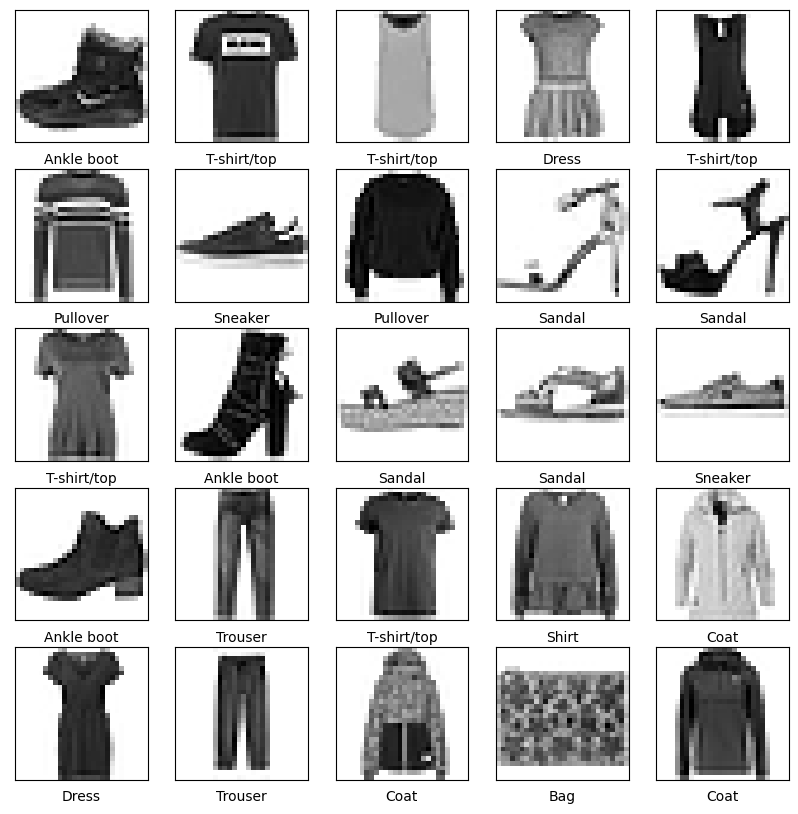

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

### creating the model

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### compiling the model

In [36]:
model.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy']
              )

### training model

In [37]:
# fitting the model
model.fit(train_images, train_labels, epochs=10)
# evaluating accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5021 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3797 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3384 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3188 - accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2990 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2598 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2507 - accuracy: 0.9051
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.242

In [38]:
# make predictions
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 865us/step


array([4.2912785e-07, 6.1179328e-10, 2.1726702e-07, 1.4133743e-10,
       4.8985419e-07, 9.8818657e-04, 3.3442831e-07, 5.1691305e-02,
       1.7373887e-07, 9.4731885e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [41]:
test_labels[0]

9

helper function to plot our predictions

In [53]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)
    
    def plot_value_array(i, predictions_array, true_label):
        true_label = true_label[i]
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1])
        predicted_label = np.argmax(predictions_array)

        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('green')

### verify predictions

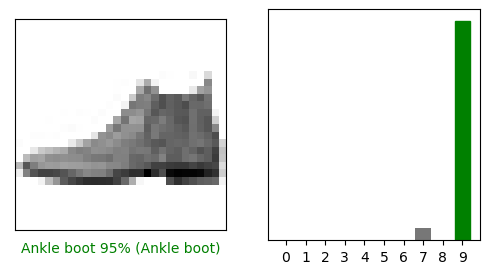

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

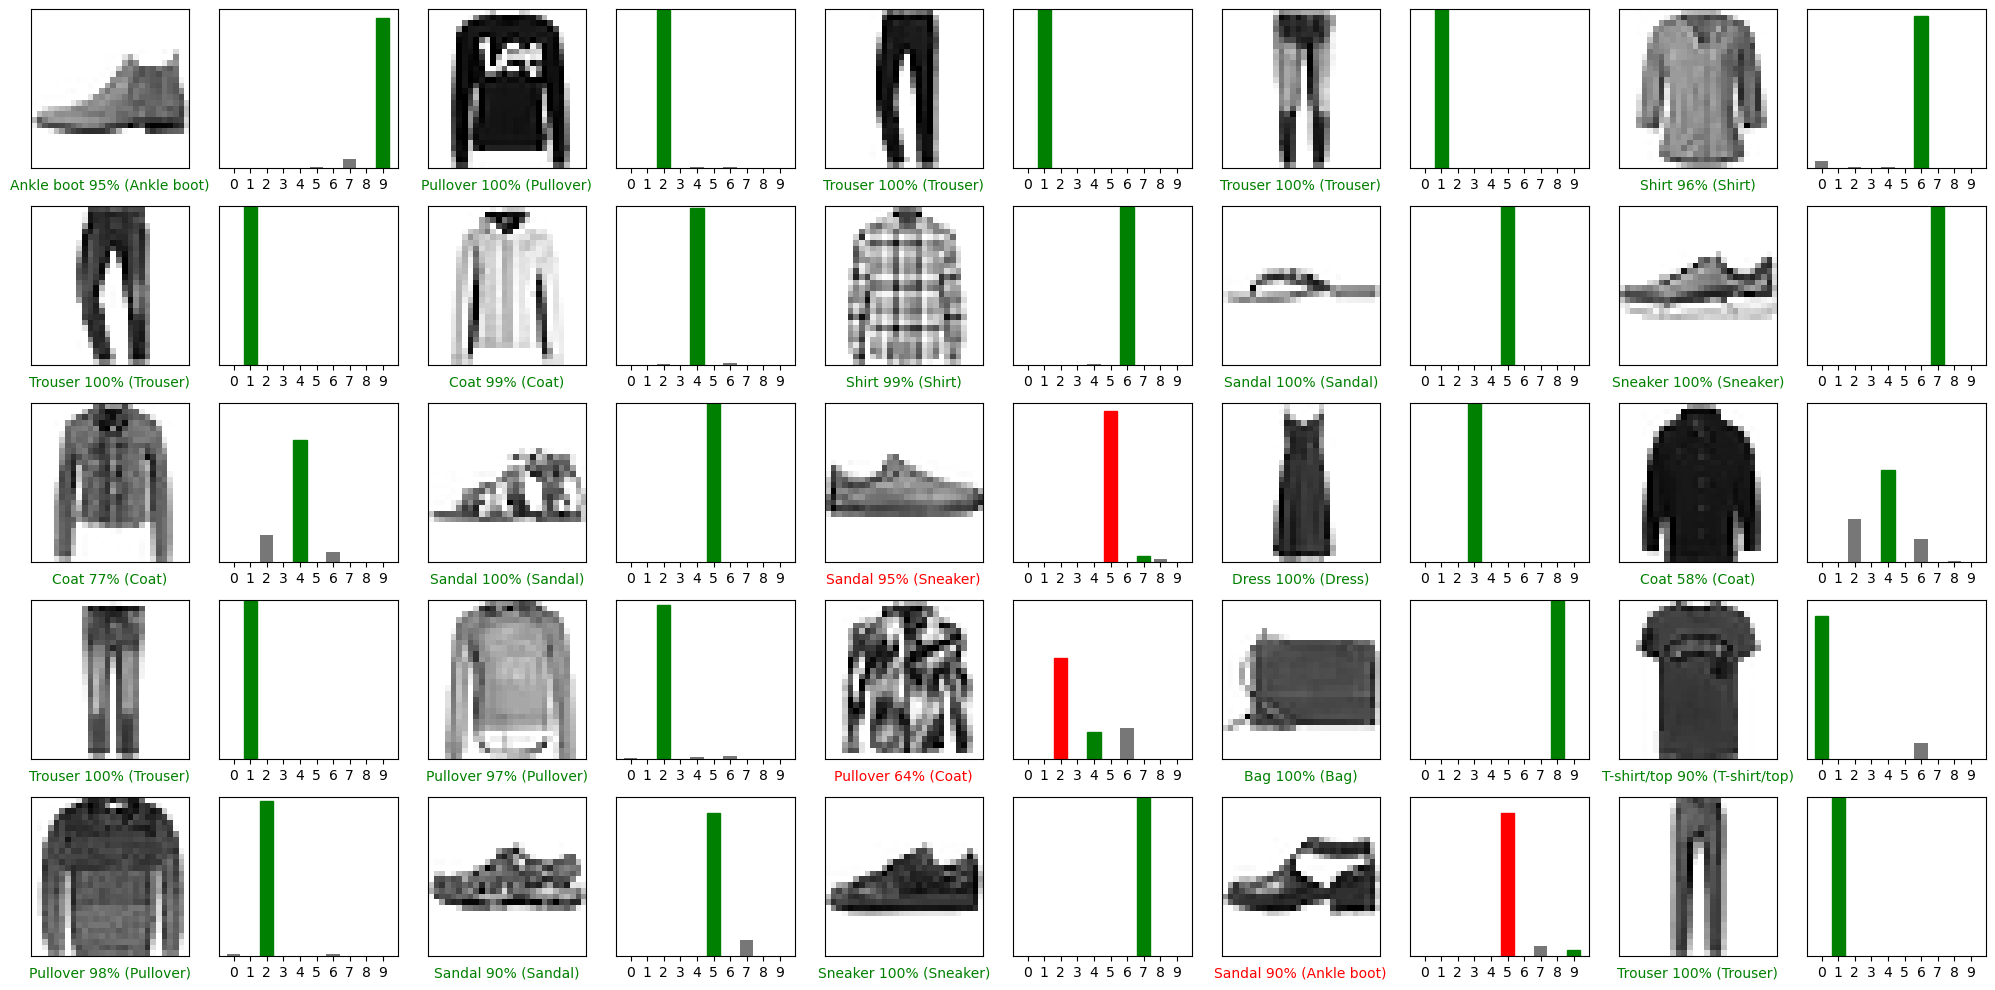

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The output looks good, only three images are wrong.